In [1]:
# Load libraries
import pandas
import numpy
from sklearn import metrics
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn import tree

c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load dataset
url = "adult.csv"
#url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
# names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df = pandas.read_csv(url)


## Dataset Description

In [3]:
####### Dataset Description #######

print(df.head(20))
print(df.describe())

    age         workclass  fnlwgt     education  educational-num  \
0    25           Private  226802          11th                7   
1    38           Private   89814       HS-grad                9   
2    28         Local-gov  336951    Assoc-acdm               12   
3    44           Private  160323  Some-college               10   
4    18                 ?  103497  Some-college               10   
5    34           Private  198693          10th                6   
6    29                 ?  227026       HS-grad                9   
7    63  Self-emp-not-inc  104626   Prof-school               15   
8    24           Private  369667  Some-college               10   
9    55           Private  104996       7th-8th                4   
10   65           Private  184454       HS-grad                9   
11   36       Federal-gov  212465     Bachelors               13   
12   26           Private   82091       HS-grad                9   
13   58                 ?  299831       HS-grad 

## Preprocessing Data

#### 1)Finding the number of missing values

In [4]:
col_names = df.columns
num_data = df.shape[0]
print("Description about the attributes containing number of missing values\n")
for c in col_names:
    # print(df[c])
    num_non = df[c].isin(["?"]).sum()
    # print(num_non)
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

Description about the attributes containing number of missing values

workclass
2799
5.73%


occupation
2809
5.75%


native-country
857
1.75%




#### 2)Impuding the missing values 
    replacing the missing with NaN then with the top occurring value in the column

In [5]:
col_names = df.columns
for c in col_names:
	df[c] = df[c].replace("?", numpy.NaN)

df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [6]:
print(df.isnull().sum())
print(df.describe())


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000  


### 3)Converting Categorical data to Numeric data
        Here in the data column 'Gender' seems very varying we reduce them to either divorced or married.
        Then apply label encoder to convert them into muneric values to categorical columns in the dataset.

In [7]:
# ### Discretisation of columns ###
# df.replace(['Divorced', 'Married-AF-spouse', 
#               'Married-civ-spouse', 'Married-spouse-absent', 
#               'Never-married','Separated','Widowed'],
#              ['divorced','married','married','married',
#               'not married','not married','not married'], inplace = True)

In [8]:
category_col =['workclass', 'race', 'education','marital-status', 'occupation',
               'relationship', 'gender', 'native-country', 'income'] 
labelEncoder = preprocessing.LabelEncoder()
for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])

# making a copy of the data frame
df.to_csv('adult_PPnoFS.csv',index=False)

## Prediction without any feature selection

## Classifier-1
### Desicion Tree

    Here we build classifier using both gini index and information gain(Entropy).
    The parameter test_size is given value 0.3; it means test sets will be 30% of whole dataset  & training dataset’s size will be 70% of the entire dataset. random_state variable is a pseudo-random number generator state used for random sampling. If you want to replicate our results, then use the same value of random_state.

In [9]:
### Slicing data ###
X = df.values[:, 0:14]
Y = df.values[:,14]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [10]:
### Desicion Tree with Gini Index ###

dt_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
dt_clf_gini.fit(X_train, y_train)
### Desicion Tree with Information Gain ###

dt_clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=5, min_samples_leaf=5)

dt_clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

 #### Now Predicting data on both classifiers using the test values

In [11]:
y_pred_gini = dt_clf_gini.predict(X_test)
y_pred_en = dt_clf_entropy.predict(X_test)

#### --> Accuracy Scores And Precision value

In [12]:
print "Desicion Tree using Gini Index\nAccuracy is ", accuracy_score(y_test,y_pred_gini)*100,"\n\nPrecision Value is\n",metrics.classification_report(y_test,y_pred_gini)
print "Desicion Tree using Information Gain\nAccuracy is ", accuracy_score(y_test,y_pred_en)*100,"\n\nPrecision Value is\n",metrics.classification_report(y_test,y_pred_en)


Desicion Tree using Gini Index
Accuracy is  85.0406060192 

Precision Value is
             precision    recall  f1-score   support

          0       0.87      0.95      0.91     11121
          1       0.77      0.54      0.63      3532

avg / total       0.84      0.85      0.84     14653

Desicion Tree using Information Gain
Accuracy is  85.0337814782 

Precision Value is
             precision    recall  f1-score   support

          0       0.87      0.95      0.91     11121
          1       0.77      0.53      0.63      3532

avg / total       0.84      0.85      0.84     14653



#### --> Confusion Matrix

[[10567   554]
 [ 1638  1894]]
[[10572   549]
 [ 1644  1888]]


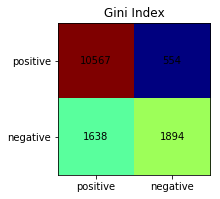

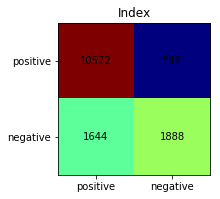

In [13]:
conf_arr_gini =confusion_matrix(y_test,y_pred_gini)
conf_arr_en =confusion_matrix(y_test,y_pred_en)

print(conf_arr_gini)
print(conf_arr_en)

norm_conf = []
for i in conf_arr_gini:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(numpy.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr_gini.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr_gini[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Gini Index")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

norm_conf_1 = []
for i in conf_arr_en:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf_1.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax1 = fig.add_subplot(1,2,2)
ax1.set_aspect(1)
res = ax1.imshow(numpy.array(norm_conf_1), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr_en.shape

for x in xrange(width):
    for y in xrange(height):
        ax1.annotate(str(conf_arr_en[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Index")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()


#### -->Roc/AOC 

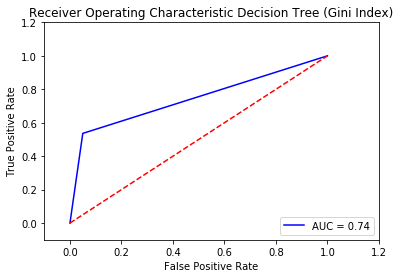

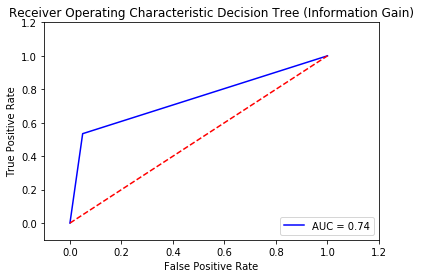

In [14]:
from sklearn.metrics import roc_curve, auc

## Gini Index

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_gini)
roc_auc_gini = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic Decision Tree (Gini Index)')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc_gini)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Information Gain
         
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_en)
roc_auc_en = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic Decision Tree (Information Gain)')
plt.plot(false_positive_rate, true_positive_rate, 'b',label= "AUC = %0.2f"% roc_auc_en)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### --> Gini Coefficient

In [15]:
Gini_coefficient_gini=2*roc_auc_gini - 1
Gini_coefficient_en=2*roc_auc_en - 1
print("Gini_coefficient of both the Decision Tree classifier models are\n")
print "Gini Index=",Gini_coefficient_gini
print "Information Gain=",Gini_coefficient_en

Gini_coefficient of both the Decision Tree classifier models are

Gini Index= 0.486424426541
Information Gain= 0.48517527215
